<a href="https://colab.research.google.com/github/tcamicr/Modelo-SIR/blob/main/Fase_4_Modelo_ISR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fase 3

Queremos crear una "ciudad" con distribución de personas diferente. Con $\bf{D}$ indicamos el "tamaño" de la ciudad y con $\bf{N}$ el número de personas de la ciudad.

In [ ]:
N = 300  
D = 100

La simulación se puede hacer en equipo, sólo en la primera actividad, donde se crea la "ciudad", cada miembro del equipo elige una ciudad diferente. Si el grupo está formado por más que 4 personas, dos personas pueden trabajar juntas.


###Problema 1: Ciudad cuadrada distribución uniforme


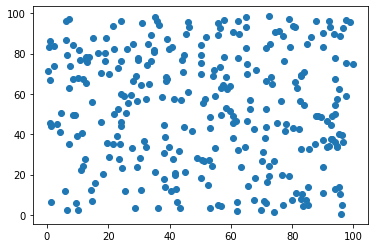

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

#### Crear los arrays xpos, ypos usando np.random.uniform() que representan las coordinadas (xpos,ypos) de las N personas
#### Pueden elegir los valores límite considerando que las N personas deben quedarse adentro de la ciudad
xpos = np.random.uniform(0,D,N)
ypos = np.random.uniform(0,D,N)
#print(len(xpos))

plt.scatter(xpos,ypos) #Plot para visualizar las personas

###Problema 2:Ciudad circular distribución uniforme

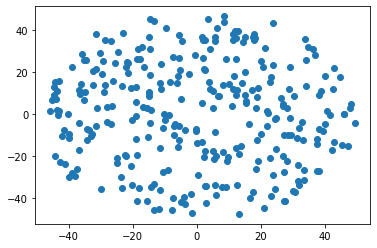

In [ ]:
import math
R = D/2 #radio de la distribución

### Generar N valores aleatorios entre 0 y 1 con la función np.random.uniform() y multiplicarlos por 2*math.pi
### para generar valores aleatorios de ángulos entre 0 y 2*Pi
alpha = np.random.uniform(0,1,N) * 2*math.pi
### Generar N valores del radio r como R*np.sqrt(d), donde d son N aleatorios entre 0 y 1 generados con np.random.uniform()
### Se usa la raíz cuadrada para generar una distribución circular uniforme, si no saldría una distribución con aros concéntricos.
r = R*np.sqrt(np.random.uniform(0,1,N))

### Convertir de coordenadas polares a cartesianas para generar las posiciones (xpos, ypos) de las N personas
xpos = r * np.cos(alpha)
ypos = r * np.sin(alpha)
plt.scatter(xpos,ypos)

### Problema 3: Ciudad cuadrada distribución en cluster


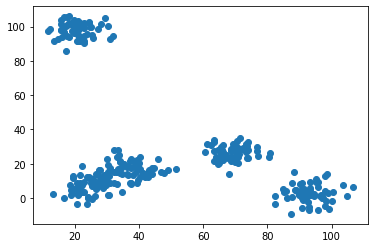

In [ ]:
import math

n_clusters = 5 #Para seleccionar el número de clusters (grupos)
nn = N // n_clusters

### Usando np.random.uniform() generar las coordenadas de centro (x0,y0) de cada cluster (en número igual a n_clusters)
### Usar como límites los límites de la ciudad
x0 = np.random.uniform(0,D,n_clusters)
y0 = np.random.uniform(0,D,n_clusters)

###Aquí abajo se crean los arrays vacíos para las posiciones (xpos,ypos) de las N personas
xpos = np.zeros((n_clusters,nn))
ypos = np.zeros((n_clusters,nn))

### Por cada cluster (índice i),generar nn valores aleatorios xpos con distribución normal, usando np.random.normal(), 
### que tenga media igual a x0[i] y desviación estándar igual a D/20. Generar nn valores aleatorios ypos con distribución normal, usando np.random.normal(), 
### que tenga media igual a y0[i] y desviación estándar igual a D/20.
for i in range(n_clusters):
  xpos[i] = np.random.normal(x0[i],D/20,nn)
  ypos[i] = np.random.normal(y0[i],D/20,nn)

##En las líneas abajo se unen todos los xpos[i] y ypos[i] para crear un único array de xpos y ypos
xpos = np.reshape(xpos,(xpos.shape[0]*xpos.shape[1],))
ypos = np.reshape(ypos,(ypos.shape[0]*ypos.shape[1],))

#clust =['cl1','cl2', 'cl3', 'cl4', 'cl5']*nn
#plt.scatter(xpos,ypos,hue='n_clusters')

plt.scatter(xpos,ypos)

### Problema 4: Ciudad circular distribución en cluster

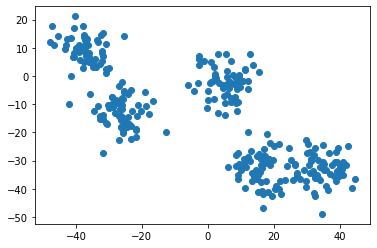

In [ ]:
import math
n_clusters = 5 #Para seleccionar el número de clusters
nn = N // n_clusters

R = D/2
##Generar aleatorios con distribución uniforme entre 0 y 1 (en número igual a n_clusters) 
##para el ángulo de cada cluster usando np.random.uniform() y multiplicándolo por 2*math.pi
alpha = np.random.uniform(0,1,n_clusters) * 2*math.pi

### Generar los radios r como R*np.sqrt(d), donde d son aleatorios con distribución uniforme (en número igual a n_clusters) entre 0 y 1
###Se usa la raíz cuadrada para generar una distribución circular uniforme, si no saldría una distribución con aros concéntricos.
r = R * np.sqrt(np.random.uniform(0,1,n_clusters))

### Calcular las posiciones del centro de cada clusters convirtiendo de coordenadas polares a cartesianas
x0 = r * np.cos(alpha)
y0 = r * np.sin(alpha)
### Se crean arrays para las posiciones
xpos = np.zeros((n_clusters,nn))
ypos = np.zeros((n_clusters,nn))

### Por cada cluster (índice i),generar nn valores aleatorios xpos con distribución normal, usando np.random.normal(), 
### que tenga media igual a x0[i] y desviación estándar igual a D/20. Generar nn valores aleatorios ypos con distribución normal, usando np.random.normal(), 
### que tenga media igual a y0[i] y desviación estándar igual a D/20.
for i in range(n_clusters):
  xpos[i] = np.random.normal(x0[i],D/20,nn)
  ypos[i] = np.random.normal(y0[i],D/20,nn)
###En las líneas abajo se unen todos los xpos[i] y ypos[i] para crear un único array de xpos y ypos
xpos = np.reshape(xpos,(xpos.shape[0]*xpos.shape[1],))
ypos = np.reshape(ypos,(ypos.shape[0]*ypos.shape[1],))

plt.scatter(xpos,ypos)

### Extra 3

In [ ]:
#Definimos la condición (status) de las personas como "susceptible", "infected","recovered","dead" 


#Condiciones iniciales:
I0  = 30 #número infectados inicial
R0 = 1 #número recuperados inicial
D0 = 0 #número muertos inicial
S0 = N-I0-D0-R0 #Número de susceptibles inicial

infection_radius = 0.6  #distancia para decidir si una persona se infecta o no
recovery_rate = 0.0006
death_rate = 0.001

### Definir un array donde aparezca un número de elementos "susceptible" igual a S0, un número de elementos "infected" igual a I0,
### un número de elementos "recovered" igual a R0 y un número de elementos "dead" igual a D0
## Sug.:usar np.repeat()

estatus = ["infected", "susceptible","recovered", "dead"]
cantidad = [I0,S0,R0,D0]
status = np.repeat(estatus,cantidad)

### Crear un array de N elementos iguales a 0 (usar np.repeat())
iteration = np.repeat(0,N)
### Crear un array de N elementos que contenga valores de 1 a N
id = np.random.uniform(1,N,N)

In [ ]:
## Aquí se crea un dataframe con las columnas 'xpos', 'ypos', 'status','iteration' y 'id'
xpos = np.random.uniform(0,D,N)
ypos = np.random.uniform(0,D,N)

df = pd.DataFrame()
df['xpos']=xpos
df['ypos']=ypos
df['status']=status
df['status'] = df['status'].astype('category')
df['iteration']=iteration
df['id']=id

In [ ]:
## Escribir una función que mide la distancia euclidiana entre dos puntos A=(x1,y1) y B=(x2,y2) y 
###regresa True si la distancia es menor que el radio de infección "infection_radius" definido arriba


def infec(A,B,idi,ids):
  dist = np.sqrt(np.sum(np.square(A-B)))

  if dist < infection_radius:
    infectado = 1
  else:
    infectado = 0

  return (infectado)

Bucle con iteraciones

In [ ]:
dd = D0
n_iter = 100



https://plotly.com/python/discrete-color/

# Fase 4: Iteración, movimiento y representación gráfica

En esta fase, usará cada estudiante la configuración de problema seleccionado durante la fase anterior. Para este problema:

Establecer el número de iteraciones (proporcionales al tiempo y considerando
una velocidad de movimiento realista).
*   Hacer un ciclo para un número apropiado de iteraciones. En cada iteración:
  *   Crear dos vectores de tamaño N donde almacenar los desplazamientos de las N personas. El desplazamiento deberá simularse nuevamente utilizando números aleatorios con distribución normal para describir cuánta distancia y en qué dirección se mueve un individuo.
  *   El vector de desplazamiento individual debe ser sumado a la posición de cada individuo.
  *   Crear dos estructuras de datos para almacenar en la primera la estructura de datos para todos los infectados de la iteración actual y en otra lo datos de la iteración siguiente.
  *   Para cada persona de la estructura de datos actual verificar si está a una distancia de los infectados tal que se pueda enfermar. Si la distancia está por debajo del valor asignado de r cambiar su estado a “infectado”.
  *   Asociar a cada persona infectada un número aleatorio entre 0 y 1. Si el número es menor que la tasa de recuperación, cambiar el estado de
“Infectado” a “Recuperado”.
  *   Actualizar la iteración en la estructura de datos y juntarla a la estructura de
la iteración anterior.
*   Crear una animación donde cada “frame” corresponde a una iteración. Puede usar plotly o una herramienta similar para este punto.



In [ ]:
import plotly.express as px

infectados =I0
susceptibles = S0
contadoriteracion = 0
tiempo=365

for k in range(tiempo):
  contadorinfectados = 0
  indicesI = [p for p, v in enumerate(status) if v == "infected"]
  indicesS = [p for p, v in enumerate(status) if v == "susceptible"]
  for i in range(infectados):
    xi=xpos[indicesI[i]]
    yi=ypos[indicesI[i]]
    idi=id[indicesI[i]]
    I = np.array((xi, yi))
    for j in range(susceptibles):
      xs=xpos[indicesS[j]]
      ys=ypos[indicesS[j]]
      ids=id[indicesS[j]]
      S = np.array((xs, ys))
      nuevoinfectado = infec(I,S,idi,ids)
      if nuevoinfectado == 1 and status[j+infectados] == "susceptible":
        contadorinfectados = contadorinfectados + nuevoinfectado
        status[j+infectados] = "infected"
  infectados = infectados + contadorinfectados
  susceptibles = susceptibles - contadorinfectados

  numran = np.random.uniform(0,1,infectados)

  for n in range(infectados):
    if numran[n] < recovery_rate:
      index = indicesI[n]
      status[index] = "recovered"
      infectados = infectados - 1

  despx = np.random.uniform(-2,2,N)
  despy = np.random.uniform(-2,2,N)

  xpos = xpos + despx
  ypos = ypos + despy

  contadoriteracion = contadoriteracion + 1
  iteration = np.repeat(contadoriteracion,N)

  df2 = pd.DataFrame()
  df2['xpos']=xpos
  df2['ypos']=ypos
  df2['status']=status
  df2['status'] = df2['status'].astype('category')
  df2['iteration']=iteration
  df2['id']=id

  df = df.append(df2)




In [ ]:
maxx = max(xpos)
maxy = max(ypos)
minx = min(xpos)
miny = min(ypos)

px.scatter(df, x="xpos", y="ypos", animation_frame="iteration", color="status", range_x=[minx,maxx], range_y=[miny,maxy])